In [2]:
import numpy as np
import pandas as pd

How many different companies are represented in the data set?
What is the total number of jobs created for businesses in Queens?
How many different unique email domains names are there in the data set?
Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
Save your result for the previous question as a CSV file.

In [3]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [8]:
df['Company Name'].value_counts().size

439

In [14]:
print(df['Company Name'].nunique())

439


In [15]:
df_Queens = df['Borough'] == 'Queens'
df.shape

(450, 26)

In [29]:
df['Domain'] = df["company email"].str.split("@", n = 1, expand = True)[1]
df['Domain'].nunique()

356

In [12]:
#df['NTA'].value_counts() >= 5
df_ = df.groupby('NTA')['Savings from beginning receiving benefits'].agg(['count','mean'])
ind = df_['count'] > 4 
df_NTA5 = df_[ind]


In [17]:
df_NTA5.to_csv('NTF_MeanSavings.csv')

scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
histogram of the log of the average total savings.
line plot of the total jobs created for each month.

In [28]:
df_NTA5.head()

,count,mean,log_mean
NTA,,,
Battery Park City-Lower Manhattan,9,3.798151e+06,15.150025
Bushwick South,10,3.078000e+05,12.637206
Carroll Gardens-Columbia Street-Red Hook,11,1.846839e+05,12.126401
College Point,7,5.742508e+05,13.260822
Crown Heights North,9,1.716897e+04,9.750859


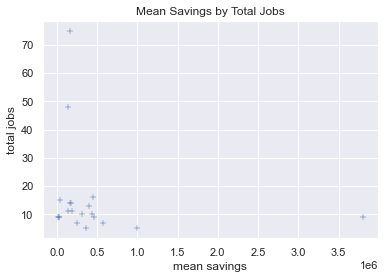

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.scatterplot(x='mean', y='count', data=df_NTA5, marker='+')

# Add some formatting to the plot:
plt.xlabel('mean savings')
plt.ylabel('total jobs')
plt.title('Mean Savings by Total Jobs');

In [ ]:
df_NTA5['log_mean']=np.log(df_NTA5['mean']) 

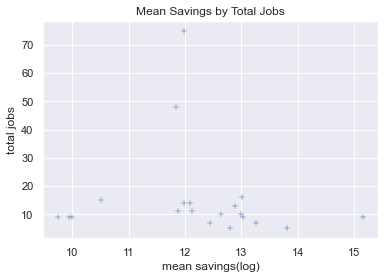

In [29]:

sns.scatterplot(x='log_mean', y='count', data=df_NTA5, marker='+')

# Add some formatting to the plot:
plt.xlabel('mean savings(log)')
plt.ylabel('total jobs')
plt.title('Mean Savings by Total Jobs');

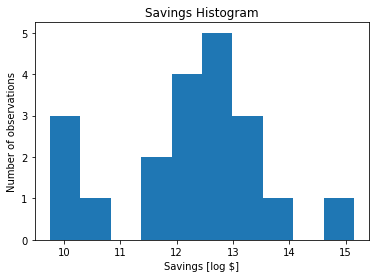

In [16]:
plt.hist(np.log(df_NTA5['mean']), bins=10)

# Add some formatting to the plot:
plt.xlabel('Savings [log $]')
plt.ylabel('Number of observations')
plt.title('Savings Histogram');

In [ ]:
plt.plot(x, x, label='linear') 
plt.xlabel('Savings [log $]')
plt.ylabel('Number of observations')